# Tutorial 2: Molecular dynamics

## Physics 7810, Spring 2020

## T2.1 - Molecular dynamics simulation of interacting particles in a central force potential

The objective of this tutorial is to write a simple molecular dynamics (MD) simulation of interacting particles in a central force potential, building on the second problem in last week's homework assignment, that involved numerical integration of the equations of motion for a single particle in a central force potential.

We'll simulate a system of $N$ identical particles moving in an attractive central force potential in two dimensions (2D), with total *external* energy

$$
U_{\rm ext}({\bf r}^N) = \sum_{i=1}^N u r_i^n.
$$

Here $n$ is a positive integer, ${\bf r}_i = (x_i,y_i)$ is the 2D position of the $i$th particle, $r_i = |{\bf r}_i|$, and the sum ranges over all $N$ particles.

The particles are assumed to interact with each other via a repulsive power-law pair potential, $u_{ij} = a r_{ij}^{-k}$, where $a$ is a positive constant, $k$ is a positive integer, ${\bf r}_{ij} = {\bf r}_j - {\bf r}_i$, and $r_{ij} = |{\bf r}_{ij}|$. The total *interaction* energy is therefore

$$
U_{\rm int}({\bf r}^N) = \sum_{i=1}^{N-1} \sum_{j=i+1}^N u_{ij} = \sum_{i=1}^{N-1} \sum_{j=i+1}^N a r_{ij}^{-k}.
$$

Note that the double sum ranges over all distinct pairs of particles. The Hamiltonian for this system is just the total energy,

$$
H({\bf p}^N,{\bf r}^N) = \sum_{i=1}^N \frac{{\bf p}_i^2}{2 m} + U_{\rm ext}({\bf r}^N) + U_{\rm int}({\bf r}^N),
$$

where ${\bf p}_i = m \dot{\bf r}_i = m (\dot{x}_i,\dot{y}_i)$ is the momentum of particle $i$, and we've assumed that all particles have the same mass $m$.

Write a MD simulation program for this system in Python, following the guidelines for structuring an MD program discussed in the lecture notes. Make your program *modular*, with separate Python functions for:
* Reading run parameters from an input file
* Initializing particle coordinates and velocities
* Computing forces (you'll need two routines, one for external forces and one for interaction forces); these routines should also return the potential energy
* Integrating the equations of motion (you should create separate velocity and position update functions if you're using the split-operator form of the velocity Verlet algorithm)
* Writing data to output files

Initializing the particle coordinates and velocities can be a bit tricky. Particles can be placed on a regular 2D lattice, or placed at random points within a specified region in the $x-y$ plane (you'll want to avoid close contacts between pairs of particles in this case). The particles can be assigned random velocities initially (sampled from either a uniform or Gaussian distribution), for instance, but feel free to experiment with other initial conditions. *Hint*: check out the `random` Python library for generating random deviates.

Once your code is running, try to come up with some ways of validating it (for specificity, start with the case $n=2$, $k=1$ (ions in a harmonic trap)). For example, the total energy and angular momentum of the system about the origin (${\bf L} = \sum_{i=1}^N {\bf r}_i \times {\bf p}_i$) should be well-conserved, for sufficiently small integration timestep. Make plots of kinetic energy, potential energy, total energy, temperature, and angular momentum as a function of time, from data stored in an output file (recall that the temperature can be calculated from the kinetic energy using the equipartition theorem). Also visualize the particle trajectories in the $x-y$ plane, using trajectories stored in an output file.

It's probably best to start with small systems (say $N = 2$) and work your way up to larger systems. See if you can get the system to crystallize by increasing the strength of the trapping potential relative to that of the repulsive interaction potential, or by varying the temperature in some way. See what happens if you 'spin up' the system by giving it a large angular momentum.

What's the minimum number of dimensionless parameters required to describe this model? Answer this question by explicitly constructing an appropriate minimal set of dimensionless parameters. *Hint*: have a look at Appendix B in Allen and Tildesley. 

### Solution

As mentioned above, the Hamiltonian of the system can be written as:
$$ H = \sum_{i=1}^{N}\frac{p_{i}^{2}}{2m} + \sum_{i=1}^{N}ur_{i}^{n} + \sum_{i=1}^{N-1}\sum_{j=i+1}^{N}ar_{ij}^{-k}$$
That is, in Cartesian coordinates, the system has the Hamiltonian:
$$ H = \sum_{i=1}^{N}\frac{p_{x,i}^{2} + p_{y,i}^{2}}{2m} + \sum_{i=1}^{N}u(x_{i}^{2}+y_{i}^{2})^{\frac{1}{2}n} + \sum_{i=1}^{N-1}\sum_{j=i+1}^{N}a [ (x_{i}-x_{j})^{2} + (y_{i}-y_{j})^{2}]^{-\frac{1}{2}k}$$
Accordingly, we have:
$$ f_{x, i} = -\frac{\partial U(x_{i},y_{i})}{\partial x_{i}} = -unxr_{i}^{n-2} + \sum_{j \neq i}^{N} ak(x_{i}-x_{j})r_{ij}^{-k-2}$$
$$ f_{y, i} = -\frac{\partial U(x_{i},y_{i})}{\partial y_{i}} = -unyr_{i}^{n-2} + \sum_{j \neq i}^{N} ak(y_{i}-y_{j})r_{ij}^{-k-2}$$
where $r_{i}=(x_{i}^{2}+y_{i}^{2})^{\frac{1}{2}}$ and $r_{ij}=[(x_{i}-x_{j})^{2} + (y_{i}-y_{j})^{2}]^{\frac{1}{2}}$ 

Therefore, given the velocity Verlet algorithm as below, 
$${\bf v}_i \left(t + \frac{\Delta t}{2} \right) = {\bf v}_i(t) + \frac{\Delta t}{2 m_i} {\bf f}_i(t)$$
$${\bf r}_i(t + \Delta t) = {\bf r}_i(t) + {\bf v}_i \left(t + \frac{\Delta t}{2} \right) \Delta t$$
$${\bf v}_i(t + \Delta t) = {\bf v}_i \left(t + \frac{\Delta t}{2} \right) + \frac{\Delta t}{2 m_i} {\bf f}_i(t + \Delta t)$$
we can write a script as shown as follows to run a MD simulation:


In [7]:
import sys
sys.path.insert(1, '../')  # so the system can locate the library folder
from CompPhysLib.MD_NVE import *

In [8]:
mdp = MDParameters('tutorial_02.yml')
MD = MolecularDynamics('tutorial_02.yml')
MD.verlet_integration(MD.velocities, MD.coords)

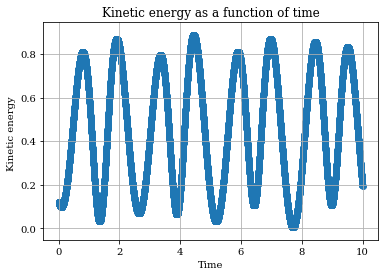

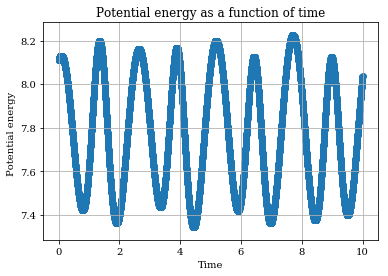

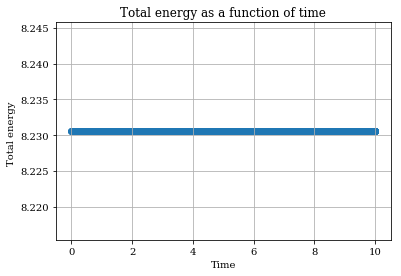

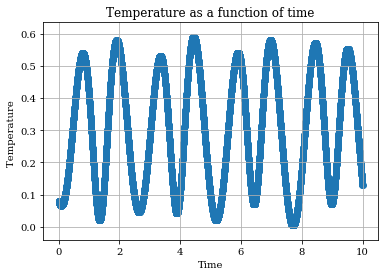

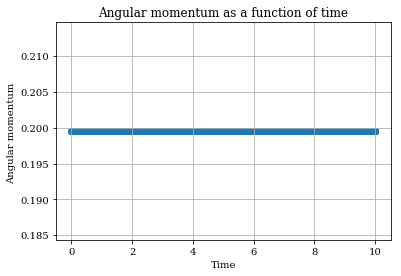

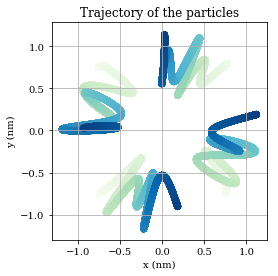

In [9]:
MDA = MDAnalysis('tutorial_02.yml', 'MD_traj.yml')
MDA.plot_all()